Model loaded: ../src/models/rf_model.pkl
Random Forest Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34291
         1.0       1.00      1.00      1.00     15709

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



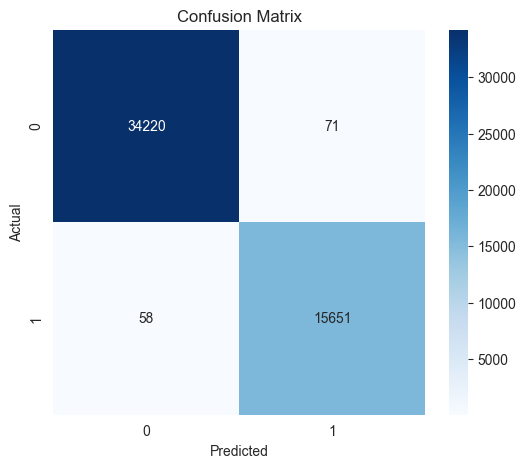

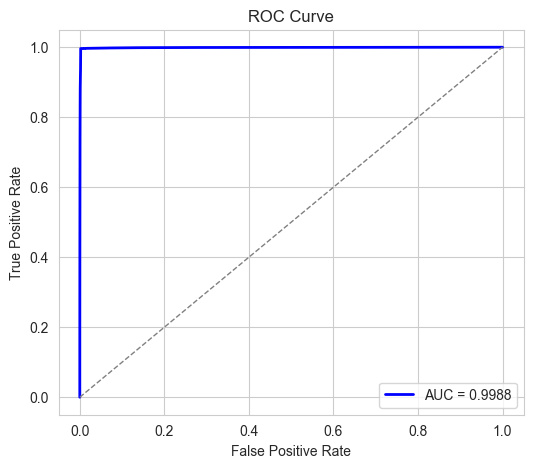

In [ ]:
# notebooks/04_evaluation.ipynb

# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")

# -------------------------------
# 2. Load Saved Model
# -------------------------------
MODEL_PATH = "../src/models/rf_model.pkl"
model = joblib.load(MODEL_PATH)
print(f"Model loaded: {MODEL_PATH}")

# -------------------------------
# 3. Load Test Data
# -------------------------------
DATA_PATH = "../data/fraud_dataset_processed.csv"
df = pd.read_csv(DATA_PATH)

X_test = df.drop("Fraud_Label", axis=1)
y_test = df["Fraud_Label"]

# -------------------------------
# 4. Make Predictions
# -------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# -------------------------------
# 5. Classification Report
# -------------------------------
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred))

# -------------------------------
# 6. Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("../results/confusion_matrix.png")
plt.show()

# -------------------------------
# 7. ROC Curve
# -------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], color="gray", lw=1, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig("../results/roc_curve.png")
plt.show()
